In [ ]:
# Code to read csv file into colaboratory:
%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from sklearn import metrics

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:

import seaborn as sns
from __future__ import division
from datetime import datetime, timedelta,date
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1EVww4qdbPtQH9m-Z14VFkeYgupSLbZzH'}) # replace the id with id of file you want to access
downloaded.GetContentFile('transactions.csv')

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1_AWBqiYc3-jmAg9G4ADJLPdmjtdahTng'}) # replace the id with id of file you want to access
downloaded.GetContentFile('months.csv')

In [ ]:
downloaded = drive.CreateFile({'id':'1uNu3dialr_tkRI4DV6wP-tMR7kSTSW_w'}) # replace the id with id of file you want to access
downloaded.GetContentFile('product.csv')

In [ ]:
data1 = pd.read_csv("transactions.csv")

In [ ]:
data1.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [ ]:
data2 = pd.read_csv("product.csv")

In [ ]:
data3 = pd.read_csv("months.csv")

In [ ]:
datamerge13= pd.merge(data1,data3, on='day', how='left')

In [ ]:
datamerge13.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,01-01-2010
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,01-01-2010
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,01-01-2010
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,01-01-2010
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,01-01-2010


In [ ]:
datamerge13.tail()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,29-12-2011
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,29-12-2011
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,29-12-2011
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,29-12-2011
5197680,1510000073,0.99,1,2209,1,104,435755,18,3316349,728,0,29-12-2011


In [ ]:
print(datamerge13.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197681 entries, 0 to 5197680
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
 11  month                object 
dtypes: float64(1), int64(10), object(1)
memory usage: 515.5+ MB
None


In [ ]:
datamerge13[datamerge13['dollar_sales'] < 0]['dollar_sales'].value_counts().sum()

4504

In [ ]:
datamerge13 = datamerge13[datamerge13['dollar_sales'] >= 0]

In [ ]:
datamerge13[datamerge13['dollar_sales'] < 0]['dollar_sales'].value_counts().sum()

0

In [ ]:
import pandas as pd  
unique_value = datamerge13["household"].nunique()
print(unique_value) 

509986


In [ ]:
import pandas as pd  
unique_value = datamerge13["basket"].nunique()
print(unique_value) 

3315532


# EDA

In [ ]:
datamerge13['month'] = pd.to_datetime(datamerge13['month'])

In [ ]:
datamerge13['YearMonth'] = datamerge13['month'].map(lambda date: 100*date.year + date.month)

In [ ]:
datamerge13['Revenue'] = datamerge13['dollar_sales']

In [ ]:
tx_revenue = datamerge13.groupby(['YearMonth'])['Revenue'].sum().reset_index()

In [ ]:
tx_revenue.head()

,YearMonth,Revenue
0,201001,405211.42
1,201002,351944.60
2,201003,386086.84
3,201004,371370.14
4,201005,390113.77


In [ ]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
plot_data = [
    go.Scatter(
        x=tx_revenue['YearMonth'],
        y=tx_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=tx_revenue.query("YearMonth < 201112")['YearMonth'],
        y=tx_revenue.query("YearMonth < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#creating monthly active customers dataframe by counting unique household 's
tx_monthly_active = datamerge13.groupby('YearMonth')['household'].nunique().reset_index()


In [ ]:
#print the dataframe
tx_monthly_active

,YearMonth,household
0,201001,103284
1,201002,94158
2,201003,102341
3,201004,98257
4,201005,102142
5,201006,102327
6,201007,103894
7,201008,98635
8,201009,97295
9,201010,97994


In [ ]:
#plotting the output
plot_data = [
    go.Bar(
        x=tx_monthly_active['YearMonth'],
        y=tx_monthly_active['household'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active households'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = datamerge13.groupby('YearMonth')['units'].sum().reset_index()

#plot
plot_data = [
    go.Bar(
        x=tx_monthly_sales['YearMonth'],
        y=tx_monthly_sales['units'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Total units order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#print the dataframe
tx_monthly_sales

,YearMonth,units
0,201001,271734
1,201002,234904
2,201003,271597
3,201004,243730
4,201005,252615
5,201006,252271
6,201007,259738
7,201008,252567
8,201009,234187
9,201010,243452


In [ ]:

# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = datamerge13.groupby('YearMonth')['Revenue'].mean().reset_index()


#plot the bar chart
plot_data = [
    go.Bar(
        x=tx_monthly_order_avg['YearMonth'],
        y=tx_monthly_order_avg['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Average revenue per order'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#print the dataframe
tx_monthly_order_avg


,YearMonth,Revenue
0,201001,1.792463
1,201002,1.774701
2,201003,1.721366
3,201004,1.798237
4,201005,1.809777
5,201006,1.805530
6,201007,1.801411
7,201008,1.763934
8,201009,1.782969
9,201010,1.755993


In [ ]:
#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = datamerge13.groupby('household').month.min().reset_index()
tx_min_purchase.columns = ['household','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
datamerge13 = pd.merge(datamerge13, tx_min_purchase, on='household')

In [ ]:
datamerge13.head()



,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,2010-01-01,201001,0.80,2010-01-01,201001
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,2010-01-01,201001,3.59,2010-01-01,201001
2,3620000470,3.59,1,719,2,25,125434,270,622642,173,0,2010-06-22,201006,3.59,2010-01-01,201001
3,7680828098,1.98,2,719,2,25,125434,270,622642,173,0,2010-06-22,201006,1.98,2010-01-01,201001
4,3620000470,3.59,1,2130,2,28,125434,270,669330,192,0,2010-11-07,201011,3.59,2010-01-01,201001


In [ ]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
datamerge13['UserType'] = 'New'
datamerge13.loc[datamerge13['YearMonth']>datamerge13['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = datamerge13.groupby(['YearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("YearMonth != 201001 and YearMonth != 201112")
plot_data = [
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'Existing'")['YearMonth'],
        y=tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'New'")['YearMonth'],
        y=tx_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing households'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = datamerge13.query("UserType == 'New'").groupby(['YearMonth'])['household'].nunique()/datamerge13.query("UserType == 'Existing'").groupby(['YearMonth'])['household'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio



,YearMonth,household
1,201002,1.275392
2,201003,0.694415
3,201004,0.443343
4,201005,0.341414
5,201006,0.276216
6,201007,0.234702
7,201008,0.189276
8,201009,0.175486
9,201010,0.159336
10,201011,0.151310


In [ ]:
#plot the result

plot_data = [
    go.Bar(
        x=tx_user_ratio.query("YearMonth>201001 and YearMonth<201112")['YearMonth'],
        y=tx_user_ratio.query("YearMonth>201001 and YearMonth<201112")['household'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New Customer Ratio'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = datamerge13.groupby(['household','YearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['household'], tx_user_purchase['YearMonth']).reset_index()

#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=tx_retention.query("YearMonth<201112")['YearMonth'],
        y=tx_retention.query("YearMonth<201112")['RetentionRate'],
        name="organic"
    )
    
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Retention Rate'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

    

# RFM model

In [ ]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
tx_user = pd.DataFrame(datamerge13['household'].unique())
tx_user.columns = ['household']




In [ ]:
#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = datamerge13.groupby('household').month.max().reset_index()
tx_max_purchase.columns = ['household','MaxPurchaseDate']



In [ ]:

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user,tx_max_purchase[['household','Recency']], on= 'household')

tx_user.head()

,household,Recency
0,125434,40
1,108320,56
2,162016,8
3,89437,42
4,158549,13


In [ ]:
#plot a recency histogram

plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


Output hidden; open in https://colab.research.google.com to view.

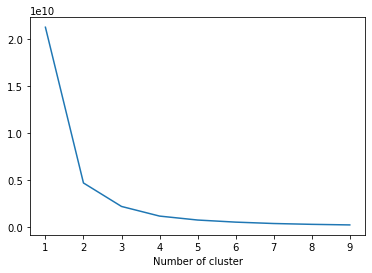

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final



In [ ]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [ ]:
tx_user

,household,Recency,RecencyCluster
0,125434,40,3
1,108320,56,3
2,162016,8,3
3,89437,42,3
4,158549,13,3
...,...,...,...
509981,338238,320,1
509982,212104,320,1
509983,205284,320,1
509984,502002,320,1


In [ ]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,67101.0,608.237865,64.987227,504.0,551.0,605.0,664.0,727.0
1,86886.0,398.979065,57.934222,299.0,349.0,397.0,450.0,503.0
2,123828.0,196.920438,50.675212,121.0,152.0,190.0,238.0,298.0
3,232171.0,44.658674,34.567176,0.0,14.0,37.0,71.0,120.0


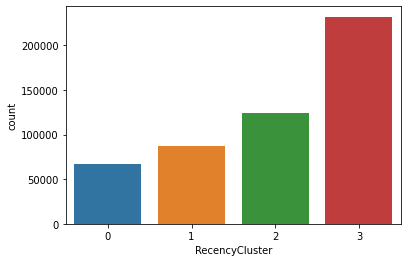

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(tx_user['RecencyCluster'],label="Count")
plt.show()

In [ ]:
#get order counts for each user and create a dataframe with it
tx_frequency = datamerge13.groupby('household').month.count().reset_index()
tx_frequency.columns = ['household','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='household')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,377254.0,3.844195,2.870107,1.0,1.0,3.0,6.0,11.0
1,93434.0,18.605422,5.244565,12.0,14.0,18.0,23.0,30.0
2,32682.0,42.909553,9.579626,31.0,35.0,41.0,50.0,66.0
3,6616.0,91.020254,27.081812,67.0,73.0,83.0,100.0,399.0


In [ ]:
#calculate revenue for each customer
tx_revenue = datamerge13.groupby('household').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='household')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,384605.0,6.751623,5.312636,0.00,2.4600,5.03,9.9700,21.04
1,93897.0,35.375185,10.955529,21.05,25.9900,32.88,43.1700,61.24
2,27178.0,87.141266,20.746580,61.25,69.7625,81.94,100.4975,141.67
3,4306.0,196.066444,66.883979,141.70,155.0425,174.94,212.1550,1105.62


In [ ]:

#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,608.900938,2.205484,3.916515
1,400.663828,3.216762,5.582253
2,206.072589,3.989191,6.797428
3,70.817089,5.580313,9.442179
4,101.520735,14.884712,25.435099
5,44.258966,20.202361,35.632022
6,39.526650,34.731899,56.586449
7,26.899920,46.170878,85.882145
8,18.909693,73.929820,124.565151


In [ ]:

tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [ ]:
tx_user

,household,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,125434,40,3,26,1,58.96,1,5,High-Value
1,168571,7,3,15,1,30.10,1,5,High-Value
2,167972,49,3,15,1,35.93,1,5,High-Value
3,122564,12,3,26,1,49.32,1,5,High-Value
4,11733,57,3,28,1,56.43,1,5,High-Value
...,...,...,...,...,...,...,...,...,...
509981,283523,368,1,118,3,154.08,3,7,High-Value
509982,263996,383,1,68,3,182.00,3,7,High-Value
509983,7488,30,3,11,0,165.51,3,6,High-Value
509984,384126,603,0,2,0,145.50,3,3,Mid-Value


In [ ]:
tx_user.groupby('Segment')['household'].describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
High-Value,98470.0,215634.887296,139441.642644,1.0,91796.75,198733.5,333875.75,510021.0
Low-Value,252809.0,255650.576427,141126.537631,3.0,135229.00,261043.0,376694.00,510027.0
Mid-Value,158707.0,278418.342342,156071.451336,8.0,143209.50,281631.0,426690.50,510023.0


In [ ]:
tx_user.head()

,household,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,125434,40,3,26,1,58.96,1,5,High-Value
1,168571,7,3,15,1,30.10,1,5,High-Value
2,167972,49,3,15,1,35.93,1,5,High-Value
3,122564,12,3,26,1,49.32,1,5,High-Value
4,11733,57,3,28,1,56.43,1,5,High-Value


# CLTV

In [ ]:
datamerge13['month'] = pd.to_datetime(datamerge13['month'])

In [ ]:
#create 3m and 6m dataframes
tx_3m = datamerge13[(datamerge13.month < datetime(2011,6,1)) & (datamerge13.month >= datetime(2011,3,1))].reset_index(drop=True)
tx_6m = datamerge13[(datamerge13.month >= datetime(2011,6,1)) & (datamerge13.month < datetime(2011,12,1))].reset_index(drop=True)


In [ ]:
tx_6m.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,1510002702,1.79,1,1626,2,54,125434,270,1636467,375,0,2011-10-01,201110,1.79,2010-01-01,201001,Existing
1,7151800016,1.59,1,1613,2,58,125434,256,1763539,402,0,2011-06-02,201106,1.59,2010-01-01,201001,Existing
2,7151800018,1.85,1,2216,2,62,125434,270,1909428,434,0,2011-10-03,201110,1.85,2010-01-01,201001,Existing
3,7680828098,1.60,2,1846,2,98,125434,270,3096888,680,0,2011-11-11,201111,1.60,2010-01-01,201001,Existing
4,9505900016,5.00,3,2237,2,99,125434,270,3137521,688,0,2011-11-19,201111,5.00,2010-01-01,201001,Existing


In [ ]:
tx_user_6m = tx_6m.groupby('household')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['household','m6_Revenue']

In [ ]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='household', how='left')
tx_merge = tx_merge.fillna(0)

In [ ]:

#remove outliers
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]


#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,377139.0,1.086879,1.540001,0.00,0.00,0.00,1.99,5.30
1,98179.0,9.514809,3.183613,5.31,6.78,8.82,11.78,16.97
2,29566.0,24.399173,5.931495,16.98,19.41,22.88,28.32,39.79


In [ ]:
tx_merge.head(1)

,household,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,125434,40,3,26,1,58.96,1,5,High-Value,11.83,1


In [ ]:
cluste = tx_merge[['Segment','LTVCluster']]

In [ ]:
cluste

,Segment,LTVCluster
0,High-Value,1
1,High-Value,1
2,High-Value,1
3,High-Value,1
4,High-Value,1
...,...,...
504879,High-Value,2
504880,High-Value,2
504881,High-Value,2
504882,High-Value,2


In [ ]:
unique_value = tx_merge["LTVCluster"].nunique()
print(unique_value) 

3


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 1 and x['Segment'] == "High-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)

In [ ]:
print(numOfRows)

48553


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 2 and x['Segment'] == "High-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)

In [ ]:
print(numOfRows)

27829


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 0 and x['Segment'] == "High-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

17002


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 0 and x['Segment'] == "Mid-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

115775


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 1 and x['Segment'] == "Mid-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

41224


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 2 and x['Segment'] == "Mid-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

1692


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 0 and x['Segment'] == "Low-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

244362


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 1 and x['Segment'] == "Low-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

8402


In [ ]:
seriesObj = tx_merge.apply(lambda x: True if x['LTVCluster'] == 2 and x['Segment'] == "Low-Value" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

45
